In [0]:
import sklearn
import numpy as np
import os 
np.random.seed(42)
# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "end_to_end_project"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
  """Save the selected figure into disc under an image extention and resolution

  Parameters
  ----------
  fig_id : figure handle
    The id number of the figure
  tight_layout : boolean (True or False)
    Specifies whenther the layout should be tight or not
  fig_extension: string
    Under what extension should the file be saved ("png" or "jpg")
  resolution: int
    the quality of the figure (ie. 100,200,300)

  Returns
  -------
  void
    Does not return any value
  """

  path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
  print("Saving figure", fig_id)
  if tight_layout:
    plt.tight_layout()
  plt.savefig(path, format=fig_extension, dpi=resolution)

In [0]:
import tarfile # to support compressed (tar) files
from six.moves import urllib # support URL download
import csv
#HOUSING_PATH = os.path.join("datasets", "housing")
HOUSING_PATH = os.path.join(".","data")
HOUSING_URL = "https://raw.githubusercontent.com/OAHC2022/ML-4774/master/codeathon/housing.csv"

def fetch_housing_data(housing_url=HOUSING_URL, housing_path=HOUSING_PATH):
    """Fetch housing data from a remote URL to Colab file system"""
    if not os.path.isdir(housing_path):
        os.makedirs(housing_path)
    csv_path = os.path.join(housing_path, "raw_housing.csv")
    urllib.request.urlretrieve(housing_url, csv_path)
    raw_housing = open(csv_path)
    info = raw_housing.readlines()
    raw_housing.close()
    
    new_file_path = os.path.join(housing_path, "housing.csv")
    with open(new_file_path,mode='w',newline='') as csvfile:
      writer = csv.writer(csvfile,delimiter=',')
      writer.writerow(["CRIM","ZN","INDUS","CHAS","NOX","RM","AGE","DIS","RAD","TAX","PTRATIO","B","LSTAT","MEDV"])
      for i in info:
        writer.writerow(i.split())

In [0]:
fetch_housing_data()

In [0]:
import pandas as pd # Pandas module to enable data manipulation

def load_housing_data(housing_path=HOUSING_PATH):
    """Load Housing Data into Workspace from a CSV"""
    csv_path = os.path.join(housing_path, "housing.csv")
    return pd.read_csv(csv_path)

In [0]:
housing = load_housing_data()


Saving figure attribute_histogram_plots


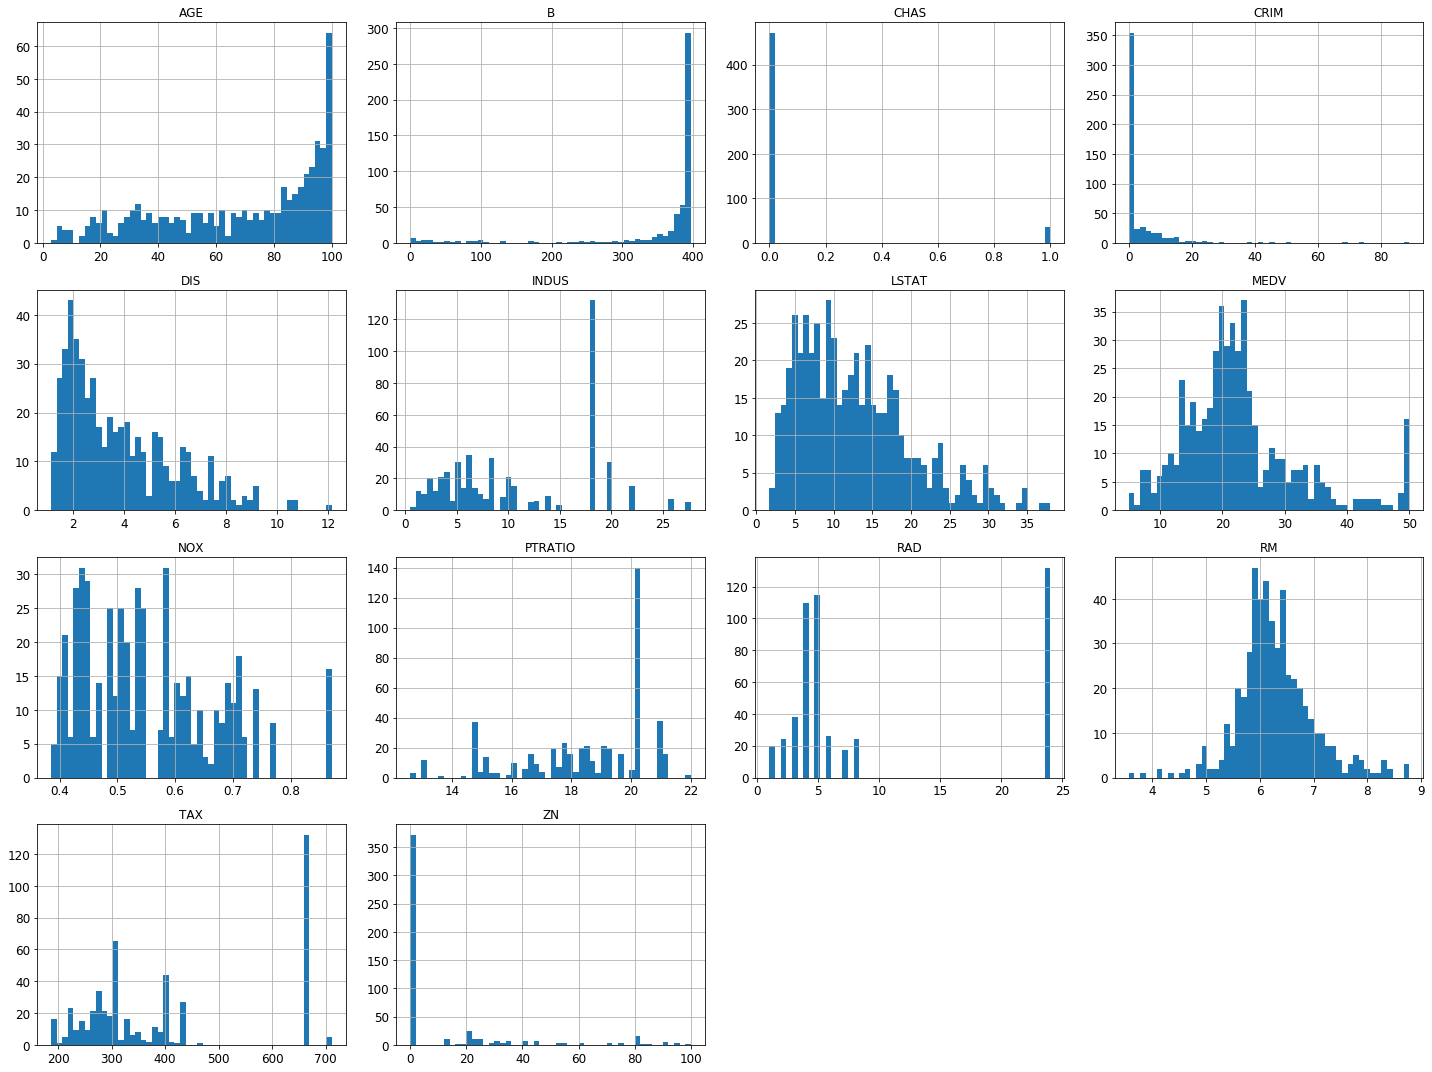

In [21]:
%matplotlib inline
import matplotlib.pyplot as plt
housing.hist(bins=50, figsize=(20,15))
save_fig("attribute_histogram_plots")
plt.show()

In [0]:
import numpy as np

# For illustration only. Sklearn has train_test_split()
def split_train_test(data, test_ratio):
    """An simple implementation of the spliting into train and test sets"""
    shuffled_indices = np.random.permutation(len(data)) # Give it random indexes
    test_set_size = int(len(data) * test_ratio) # split into ratio
    test_indices = shuffled_indices[:test_set_size] # extract index of test examples
    train_indices = shuffled_indices[test_set_size:] # extract index of train examples
    return data.iloc[train_indices], data.iloc[test_indices] # return the splited data

In [23]:
train_set, test_set = split_train_test(housing, 0.2)

len(train_set)
print(train_set.shape)
print(test_set.shape)

(405, 14)
(101, 14)


In [0]:
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42)

In [0]:
# Make a copy of the stratified train set
housing = train_set.copy()


In [0]:
# Use corr() to see the correlations (aka Standard Correlation Coefficient or Pearson's r) among the features of the dataset
corr_matrix = housing.corr()

In [27]:
# Let's look at how much each feature correlates to the house value 
corr_matrix["MEDV"].sort_values(ascending=False)

MEDV       1.000000
RM         0.710680
B          0.339918
ZN         0.309504
DIS        0.235114
CHAS       0.190642
AGE       -0.340216
CRIM      -0.380091
RAD       -0.387467
NOX       -0.415768
TAX       -0.459795
INDUS     -0.470546
PTRATIO   -0.491210
LSTAT     -0.736422
Name: MEDV, dtype: float64

In [0]:
# Create the features and labels for training
housing = train_set.drop("MEDV", axis=1) # drop labels for training set
housing_labels = train_set["MEDV"].copy()




In [29]:

from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

housing_prepared = housing
lin_reg = LinearRegression()
lin_reg.fit(housing_prepared, housing_labels)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [30]:
from sklearn.metrics import mean_squared_error

housing_predictions = lin_reg.predict(housing_prepared)
lin_mse = mean_squared_error(housing_labels, housing_predictions)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

4.6520331848801675

In [31]:
from sklearn.metrics import mean_absolute_error

lin_mae = mean_absolute_error(housing_labels, housing_predictions)
lin_mae

3.314771626783228

In [32]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor(random_state=42)
tree_reg.fit(housing_prepared, housing_labels)

housing_predictions = tree_reg.predict(housing_prepared)
tree_mse = mean_squared_error(housing_labels, housing_predictions)
tree_rmse = np.sqrt(tree_mse)
tree_rmse

0.0

In [33]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(tree_reg, housing_prepared, housing_labels,
                         scoring="neg_mean_squared_error", cv=5)
tree_rmse_scores = np.sqrt(-scores)

def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())

display_scores(tree_rmse_scores)

Scores: [4.93924821 6.02036667 5.13067512 6.34748905 4.51727241]
Mean: 5.39101029034062
Standard deviation: 0.6850142109435617


In [34]:
lin_scores = cross_val_score(lin_reg, housing_prepared, housing_labels,
                             scoring="neg_mean_squared_error", cv=10)
lin_rmse_scores = np.sqrt(-lin_scores)
display_scores(lin_rmse_scores)

Scores: [3.76298481 4.25110998 5.34719644 6.71464778 4.59265163 5.17395941
 4.43145447 4.5777583  3.6723473  5.77030866]
Mean: 4.829441880454281
Standard deviation: 0.8896329730748506


In [35]:
from sklearn.ensemble import RandomForestRegressor

forest_reg = RandomForestRegressor(n_estimators=100, random_state=42)
forest_reg.fit(housing_prepared, housing_labels)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=42, verbose=0, warm_start=False)

In [36]:
housing_predictions = forest_reg.predict(housing_prepared)
forest_mse = mean_squared_error(housing_labels, housing_predictions)
forest_rmse = np.sqrt(forest_mse)
forest_rmse

1.409453259281417

In [37]:
from sklearn.model_selection import cross_val_score

forest_scores = cross_val_score(forest_reg, housing_prepared, housing_labels,
                                scoring="neg_mean_squared_error", cv=10)
forest_rmse_scores = np.sqrt(-forest_scores)
display_scores(forest_rmse_scores)

Scores: [3.14867985 3.41513628 2.85968014 5.45864135 4.78700206 2.95979371
 3.87185168 2.74707284 2.49503876 4.76253751]
Mean: 3.6505434165753408
Standard deviation: 0.9699277345049182


In [38]:
from sklearn.model_selection import GridSearchCV

param_grid = [
    # try 12 (3×4) combinations of hyperparameters
    {'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]},
    # then try 6 (2×3) combinations with bootstrap set as False
    {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]},
  ]

forest_reg = RandomForestRegressor(random_state=42)
# train across 5 folds, that's a total of ? rounds of training 
grid_search = GridSearchCV(forest_reg, param_grid, cv=5,
                           scoring='neg_mean_squared_error',
                           return_train_score=True)
grid_search.fit(housing_prepared, housing_labels)

GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                             criterion='mse', max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             max_samples=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators=100, n_jobs=None,
                                             oob_score=False, random_state=42,
                                             verbose=0, warm_start=False),
             iid='deprecated', n_jobs

In [39]:
grid_search.best_params_

{'max_features': 6, 'n_estimators': 30}

In [40]:
grid_search.best_estimator_

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features=6, max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=30, n_jobs=None, oob_score=False,
                      random_state=42, verbose=0, warm_start=False)

In [41]:
cvres = grid_search.cv_results_
# zip() is to combine the column "mean_test_score" with struct "params"
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

4.839103625942133 {'max_features': 2, 'n_estimators': 3}
4.182114762390252 {'max_features': 2, 'n_estimators': 10}
3.9613930619270388 {'max_features': 2, 'n_estimators': 30}
5.010726248531535 {'max_features': 4, 'n_estimators': 3}
3.970547126602063 {'max_features': 4, 'n_estimators': 10}
3.7649105480532006 {'max_features': 4, 'n_estimators': 30}
4.26826673556444 {'max_features': 6, 'n_estimators': 3}
3.8652947123037027 {'max_features': 6, 'n_estimators': 10}
3.6375269606663765 {'max_features': 6, 'n_estimators': 30}
4.380856205970893 {'max_features': 8, 'n_estimators': 3}
3.7789497214058803 {'max_features': 8, 'n_estimators': 10}
3.7075538764680926 {'max_features': 8, 'n_estimators': 30}
4.206258356561079 {'bootstrap': False, 'max_features': 2, 'n_estimators': 3}
3.8908428821186463 {'bootstrap': False, 'max_features': 2, 'n_estimators': 10}
4.109509431070862 {'bootstrap': False, 'max_features': 3, 'n_estimators': 3}
3.819048408962631 {'bootstrap': False, 'max_features': 3, 'n_estimator

In [42]:
# View the research results in table format
pd.DataFrame(grid_search.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_features,param_n_estimators,param_bootstrap,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.009315,0.002096,0.001905,0.000102,2,3,NaN,"{'max_features': 2, 'n_estimators': 3}",-17.823512,-30.405281,-24.514636,-18.763676,-25.577514,-23.416924,4.640027,17,-5.651634e+00,-6.434424e+00,-4.403020e+00,-5.400399e+00,-8.686495e+00,-6.115194e+00,1.440198e+00
1,0.019372,0.000515,0.002638,0.000219,2,10,NaN,"{'max_features': 2, 'n_estimators': 10}",-12.754056,-24.449932,-15.912659,-13.837999,-20.495774,-17.490084,4.375605,12,-3.282502e+00,-3.455298e+00,-2.648772e+00,-3.353178e+00,-3.886080e+00,-3.325166e+00,3.979124e-01
2,0.053274,0.001843,0.004260,0.000278,2,30,NaN,"{'max_features': 2, 'n_estimators': 30}",-12.385221,-19.596318,-15.523682,-12.257049,-18.700905,-15.692635,3.067873,9,-2.271310e+00,-2.006099e+00,-2.163580e+00,-2.561024e+00,-2.433412e+00,-2.287085e+00,1.954020e-01
3,0.008205,0.000832,0.001867,0.000208,4,3,NaN,"{'max_features': 4, 'n_estimators': 3}",-22.000494,-34.519822,-25.887833,-23.769726,-19.359014,-25.107378,5.170859,18,-6.421201e+00,-5.398115e+00,-5.693729e+00,-7.918029e+00,-6.957229e+00,-6.477660e+00,9.041905e-01
4,0.021650,0.000667,0.002664,0.000479,4,10,NaN,"{'max_features': 4, 'n_estimators': 10}",-13.071628,-19.737020,-14.614421,-14.111637,-17.291516,-15.765244,2.425650,10,-3.316386e+00,-2.967084e+00,-2.850778e+00,-3.061384e+00,-3.055826e+00,-3.050291e+00,1.534204e-01
5,0.060183,0.003200,0.003973,0.000305,4,30,NaN,"{'max_features': 4, 'n_estimators': 30}",-11.445843,-19.022061,-13.896848,-11.181240,-15.326764,-14.174551,2.874329,4,-2.088906e+00,-2.197785e+00,-1.912169e+00,-2.442342e+00,-2.108590e+00,-2.149959e+00,1.730654e-01
6,0.009184,0.000156,0.001888,0.000101,6,3,NaN,"{'max_features': 6, 'n_estimators': 3}",-17.615267,-20.117901,-19.645226,-17.302346,-16.409764,-18.218101,1.422535,14,-6.408277e+00,-4.773013e+00,-4.031211e+00,-5.550375e+00,-7.287829e+00,-5.610141e+00,1.153172e+00
7,0.022957,0.000559,0.002266,0.000267,6,10,NaN,"{'max_features': 6, 'n_estimators': 10}",-11.928769,-19.604394,-16.165040,-12.259112,-14.745201,-14.940503,2.812469,7,-3.075297e+00,-2.545455e+00,-2.557962e+00,-2.567962e+00,-2.945561e+00,-2.738447e+00,2.259424e-01
8,0.065315,0.002032,0.004120,0.000267,6,30,NaN,"{'max_features': 6, 'n_estimators': 30}",-10.160751,-18.926063,-12.561263,-9.714557,-14.795379,-13.231602,3.379981,1,-2.051593e+00,-1.917295e+00,-1.830829e+00,-2.228932e+00,-1.979343e+00,-2.001598e+00,1.348666e-01
9,0.009949,0.000239,0.001852,0.000151,8,3,NaN,"{'max_features': 8, 'n_estimators': 3}",-16.677257,-23.991674,-18.752209,-18.178422,-18.359944,-19.191901,2.500955,16,-5.396581e+00,-4.463254e+00,-4.754771e+00,-5.622693e+00,-6.105665e+00,-5.268593e+00,5.924595e-01


In [43]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

param_distribs = {
        'n_estimators': randint(low=1, high=200),
        'max_features': randint(low=1, high=8),
    }

forest_reg = RandomForestRegressor(random_state=42)
rnd_search = RandomizedSearchCV(forest_reg, param_distributions=param_distribs,
                                n_iter=10, cv=5, scoring='neg_mean_squared_error', random_state=42)
rnd_search.fit(housing_prepared, housing_labels)

RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   ccp_alpha=0.0,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   max_samples=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators=100,
                              

In [44]:
cvres = rnd_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

3.6876360188825386 {'max_features': 7, 'n_estimators': 180}
3.908728044508332 {'max_features': 5, 'n_estimators': 15}
3.71295523693978 {'max_features': 3, 'n_estimators': 72}
3.8141231331419205 {'max_features': 5, 'n_estimators': 21}
3.721043762754497 {'max_features': 7, 'n_estimators': 122}
3.7142024827630173 {'max_features': 3, 'n_estimators': 75}
3.7057129817665864 {'max_features': 3, 'n_estimators': 88}
3.627176442500538 {'max_features': 5, 'n_estimators': 100}
3.717044905502202 {'max_features': 3, 'n_estimators': 150}
4.988265149080476 {'max_features': 5, 'n_estimators': 2}


In [45]:
feature_importances = grid_search.best_estimator_.feature_importances_
#cat_encoder = cat_pipeline.named_steps["cat_encoder"] # old solution
#cat_encoder = full_pipeline.named_transformers_["cat"]
#cat_one_hot_attribs = list(cat_encoder.categories_[0])
attributes = ["CRIM","ZN","INDUS","CHAS","NOX","RM","AGE","DIS","RAD","TAX","PTRATIO","B","LSTAT","MEDV"]
sorted(zip(feature_importances, attributes), reverse=True)

[(0.3778866880769631, 'RM'),
 (0.29864333340619226, 'LSTAT'),
 (0.05918837854862702, 'DIS'),
 (0.05774893987035363, 'PTRATIO'),
 (0.048737381314613186, 'CRIM'),
 (0.04398492702214148, 'INDUS'),
 (0.02921108536079127, 'NOX'),
 (0.027473471485069085, 'AGE'),
 (0.021978060307266754, 'TAX'),
 (0.019321663136088758, 'B'),
 (0.007964826035290262, 'RAD'),
 (0.0062255004760482895, 'CHAS'),
 (0.0016357449605549196, 'ZN')]

In [48]:
final_model = grid_search.best_estimator_

X_test = test_set.drop("MEDV", axis=1)
y_test = test_set["MEDV"].copy()

#X_test_prepared = full_pipeline.transform(X_test)
#final_predictions = final_model.predict(X_test_prepared)

final_mse = mean_squared_error(y_test, final_model.predict(X_test))
final_rmse = np.sqrt(final_mse)
final_rmse


2.953709532096885